# Tarea 2: Grupo 3
## Integrantes
20166498	LEÓN HUAMÁN, MARÍA LESLY

20180619	DAVILA VASQUEZ, MARIA PAULA

20181302	ZAVALA CASTILLO, ARIANNA NICKOLE

F1516944	MOLINA LEÓN, NICOLE CAMILA


## Regularización y Métodos de Ensamble
### Parte 1: Regularización para Predecir Precios de Viviendas
#### 0.1.1. Preparación de datos

In [1]:
# Librerias
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', message="Coordinate descent without L1 regularization may lead to unexpected results and is discouraged.")
warnings.filterwarnings('ignore', category=ConvergenceWarning)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [2]:
# Basic
import numpy as np
import pandas as pd
from functools import partial

# Scikit-Learn
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Matplotlib
from matplotlib.pyplot import subplots

##### 0.1.1.a. Cargar el dataset

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/boston.csv')

##### 0.1.1.b. Explorar la base de datos

In [4]:
data.shape             
data.info()            
data.head()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [5]:
data = data.dropna()
data = data.drop(columns = ['Unnamed: 0'])
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


##### 0.1.1.c. Separar los datos en predictores (x) y variable objetivo (y, medv) 

In [6]:
Y = np.array(data['medv'])
X = data.drop(columns=['medv'])

##### 0.1.1.d. Divida los datos en un conjunto de entrenamiento (80 %) y un conjunto de prueba (20 %). Use un random state=42.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##### 0.1.1.e. Estandarice las caracterısticas en X usando StandardScaler. Ajuste el escalador solo con los datos de entrenamiento y luego transforme ambos conjuntos.

In [8]:
scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test) 

#### 0.1.2. Implementación e Interpretación de Lasso y Ridge
##### 0.1.2.a. Lasso: Entrene un objeto LassoCV con 10 pliegues (cv=10) sobre los datos de entrenamiento para encontrar el lambda optimo. Imprima el valor encontrado y grafique.


In [14]:
# 1. Define CV strategy and scaler
K = 10
kfold = skm.KFold(K, random_state=0, shuffle=True)
scaler = StandardScaler(with_mean=True, with_std=True)

# 2. Define the LassoCV model and pipeline
lassoCV = skl.ElasticNetCV(n_alphas=100, l1_ratio=1, cv=kfold)  # Model
pipeCV_lasso = Pipeline(steps=[('scaler', scaler), ('lasso', lassoCV)])

# 3. Fit the pipeline on the training data
pipeCV_lasso.fit(X_train, Y_train)

# Extract the tuned model
tuned_lasso = pipeCV_lasso.named_steps['lasso']


El mejor lambda (alpha) para Lasso es: 0.025842113756363888
El MSE de CV en el conjunto de entrenamiento es: 25.312340985374327


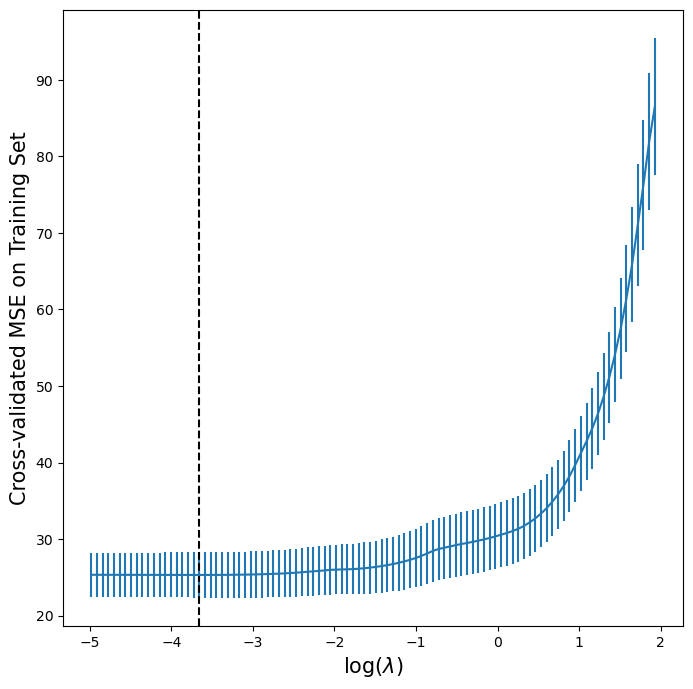

In [15]:
lassoCV_fig, ax = subplots(figsize=(8, 8))
ax.errorbar(np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel(r'$\log(\lambda)$', fontsize=15)
ax.set_ylabel('Cross-validated MSE on Training Set', fontsize=15)

# Print the optimal lambda
best_lambda_lasso = tuned_lasso.alpha_
print(f"El mejor lambda (alpha) para Lasso es: {best_lambda_lasso}")
print(f"El MSE de CV en el conjunto de entrenamiento es: {np.min(tuned_lasso.mse_path_.mean(1))}")

##### 0.1.2.b. Muestre los coeficientes del mejor modelo Lasso. En este dataset, ¿Lasso elimino alguna variable (establecio su coeficiente en cero)? Basado en los coeficientes no nulos, ¿cuales parecen ser los predictores mas importantes segun el modelo?

In [16]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
Y_pred = pipeCV_lasso.predict(X_test)

# Calculate the Mean Squared Error on the test set
test_mse = mean_squared_error(Y_test, Y_pred)

print(f"El Mean Squared Error (MSE) final en el conjunto de prueba es: {test_mse:.2f}")

El Mean Squared Error (MSE) final en el conjunto de prueba es: 23.02


In [17]:
lasso_final_coefs = tuned_lasso.coef_
lasso_final_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso_final_coefs})
lasso_final_df = lasso_final_df.sort_values(by='Coefficient', ascending=False)

# Display only variables with non-zero coefficients
print("Variables seleccionadas por Lasso (coeficiente no nulo):")
display(lasso_final_df[lasso_final_df['Coefficient'] != 0])

Variables seleccionadas por Lasso (coeficiente no nulo):


,Variable,Coefficient
5,rm,3.029596
8,rad,1.619588
3,chas,0.785733
1,zn,0.589211
6,age,-0.045283
0,crim,-1.052130
9,tax,-1.440458
10,ptratio,-1.949367
4,nox,-1.989313
7,dis,-2.927227


##### En este dataset, ¿Lasso elimino alguna variable (establecio su coeficiente en cero)?

In [18]:
num_vars_totales = X.shape[1]
num_vars_no_cero = sum(tuned_lasso.coef_ != 0)
num_vars_cero = sum(tuned_lasso.coef_ == 0)

print(f"Total variables: {num_vars_totales}")
print(f"Variables con coeficiente ≠ 0: {num_vars_no_cero}")
print(f"Variables eliminadas (coeficiente = 0): {num_vars_cero}")

Total variables: 12
Variables con coeficiente ≠ 0: 11
Variables eliminadas (coeficiente = 0): 1


Lasso eliminó 1 variable

##### Basado en los coeficientes no nulos, ¿cuales parecen ser los predictores mas importantes segun el modelo?

Entre las variables retenidas, los predictores más influyentes sobre el valor medio de las viviendas (medv) son:
- RM (average number of rooms per dwelling): presenta un coeficiente positivo, lo que sugiere que a mayor número promedio de habitaciones, mayor es el valor de la vivienda.
- LSTAT (% lower status of the population): presenta un coeficiente negativo, indicando que un mayor porcentaje de población de bajo estatus socioeconómico se asocia con menores valores de vivienda.

##### 0.1.2.c. **Ridge:** De manera similar, entrene un objeto RidgeCV con 10 pliegues para encontrar el lambda óptimo. Imprima el valor encontrado y grafique.

In [20]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
lambdas = 10**np.linspace(8, -2, 100) / Y.std()
soln_array = skl.ElasticNet.path(Xs, Y, l1_ratio=0, alphas=lambdas)[1] #Modelo

In [21]:
# Visualización de coeficientes
soln_path = pd.DataFrame(soln_array.T, columns=X.columns, index=np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
negative log(lambda),,,,,,,,,,,,
16.202781,-3.278049e-07,3.042862e-07,-4.083584e-07,1.479538e-07,-3.607421e-07,5.870196e-07,-3.182232e-07,2.109885e-07,-3.221670e-07,-3.955357e-07,-4.286711e-07,-6.227314e-07
15.970197,-4.136428e-07,3.839656e-07,-5.152898e-07,1.866966e-07,-4.552048e-07,7.407347e-07,-4.015520e-07,2.662373e-07,-4.065285e-07,-4.991094e-07,-5.409215e-07,-7.857978e-07
15.737612,-5.219579e-07,4.845095e-07,-6.502218e-07,2.355843e-07,-5.744032e-07,9.347011e-07,-5.067011e-07,3.359532e-07,-5.129807e-07,-6.298045e-07,-6.825655e-07,-9.915642e-07
15.505028,-6.586360e-07,6.113815e-07,-8.204867e-07,2.972737e-07,-7.248144e-07,1.179459e-06,-6.393841e-07,4.239247e-07,-6.473080e-07,-7.947230e-07,-8.612998e-07,-1.251212e-06
15.272444,-8.311041e-07,7.714757e-07,-1.035336e-06,3.751169e-07,-9.146118e-07,1.488308e-06,-8.068109e-07,5.349320e-07,-8.168098e-07,-1.002826e-06,-1.086837e-06,-1.578850e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
-5.892732,-1.031527e+00,1.072859e+00,6.032028e-02,7.251458e-01,-2.131947e+00,2.580825e+00,9.133249e-02,-3.098026e+00,2.421128e+00,-2.045346e+00,-2.016508e+00,-3.918180e+00
-6.125317,-1.033870e+00,1.077186e+00,6.672251e-02,7.242429e-01,-2.140016e+00,2.578179e+00,9.339843e-02,-3.105828e+00,2.440486e+00,-2.063340e+00,-2.018791e+00,-3.922270e+00
-6.357901,-1.035747e+00,1.080653e+00,7.188103e-02,7.235148e-01,-2.146460e+00,2.576055e+00,9.505444e-02,-3.112039e+00,2.456054e+00,-2.077842e+00,-2.020615e+00,-3.925528e+00


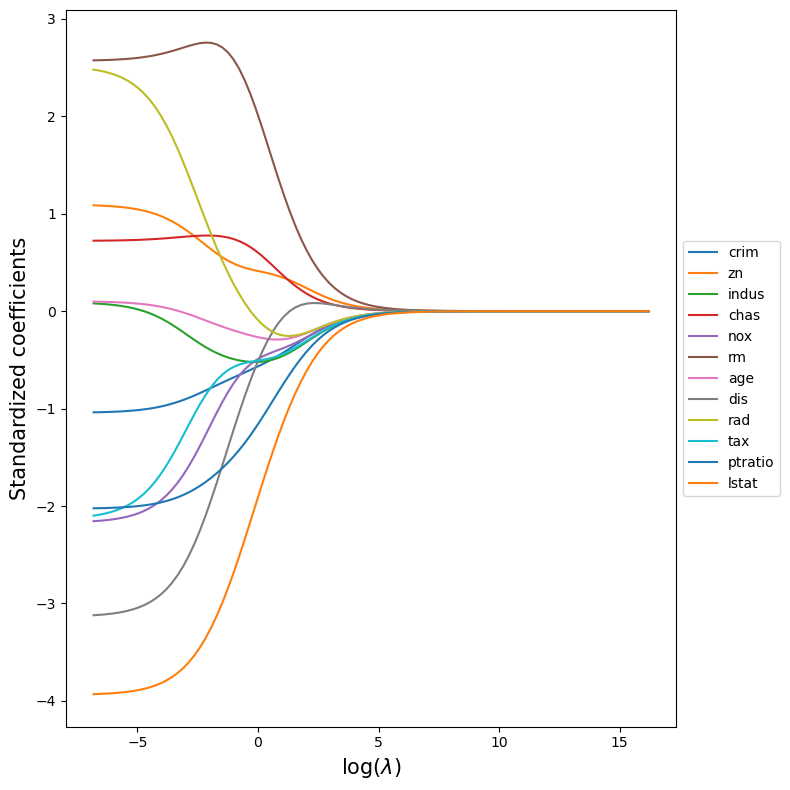

In [22]:
# Gráfico de los coeficientes

path_fig, ax = subplots(figsize=(8, 8))
soln_path.plot(ax=ax, legend=True)
ax.set_xlabel(r'$\log(\lambda)$', fontsize=15)
ax.set_ylabel('Standardized coefficients', fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
path_fig.tight_layout()

In [26]:
K = 10
kfold = skm.KFold(K, random_state=0, shuffle=True)
lambdas = 10**np.linspace(8, -2, 100) / Y.std()
scaler = StandardScaler(with_mean=True, with_std=True)

In [29]:
#Construyendo el modelo ridge
ridgeCV = skl.ElasticNetCV(alphas=lambdas, l1_ratio=0, cv=kfold)  # Model
pipeCV_ridge = Pipeline(steps=[('scaler', scaler), ('ridge', ridgeCV)])

In [30]:
pipeCV_ridge.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([1.08837478e+07, 8.62518396e+06, 6.83531079e+06, 5.41686690e+06,
       4.29277438e+06, 3.40195029e+06, 2.69598742e+06, 2.13652393e+06,
       1.69315867e+06, 1.34179929e+06, 1.06335299e+06, 8.42689062e+05,
       6.67816670e+05, 5.29233290e+05, 4.19408332e+05, 3.32373930e+05,
       2.63400656e+05, 2.08740515e+05,...
       9.03587859e-02, 7.16077925e-02, 5.67479510e-02, 4.49717807e-02,
       3.56393671e-02, 2.82435889e-02, 2.23825612e-02, 1.77377970e-02,
       1.40569008e-02, 1.11398535e-02, 8.82814336e-03, 6.99615263e-03,
       5.54433132e-03, 4.39378775e-03, 3.48200165e-03, 2.75942676e-03,
       2.18679852e-03, 1.73300043e-03, 1.37337320e-03, 1.08837478e-03]),
                              cv=KFold(n_splits=10, random_state=0, shuffle=True),
                              l1_ratio=0))])

In [39]:
tuned_ridge  = pipeCV_ridge.named_steps['ridge']
best_lambda  = tuned_ridge.alpha_

Text(0.5, 1.0, 'RidgeCV')

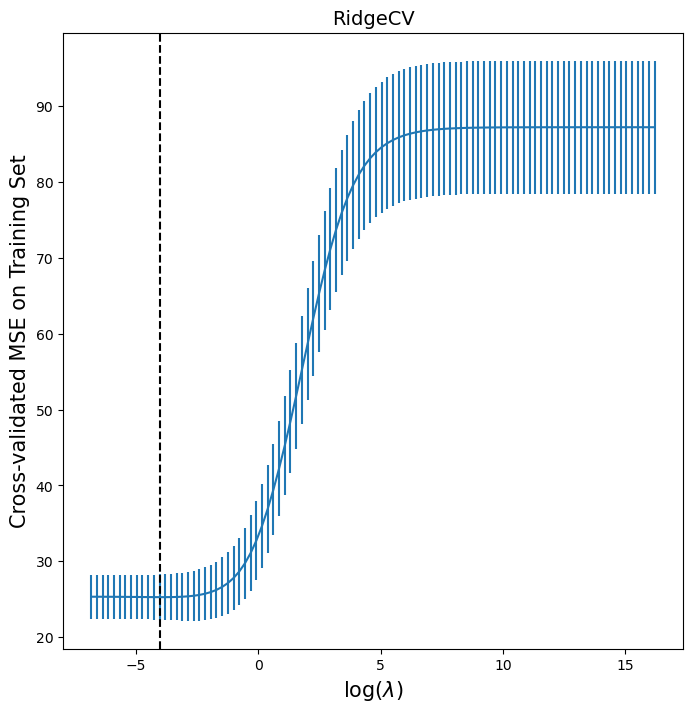

In [41]:
# Gráfico
ridge_fig, ax = subplots(figsize=(8, 8))
ax.errorbar( np.log(tuned_ridge.alphas_),tuned_ridge.mse_path_.mean(1),yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_xlabel(r'$\log(\lambda)$', fontsize=15)
ax.set_ylabel('Cross-validated MSE on Training Set', fontsize=15)
ax.set_title('RidgeCV', fontsize=14)

In [43]:
# Print results
best_lambda_ridge = tuned_ridge.alpha_
print(f"El mejor lambda para ridge: {best_lambda_ridge}")
print(f"El MSE de CV en el conjunto de entrenamiento es: {np.min(tuned_ridge.mse_path_.mean(1))}")

El mejor lambda para ridge: 0.01773779698239702
El MSE de CV en el conjunto de entrenamiento es: 25.283233296917132


##### 0.1.2.d. Muestre los coeficientes del mejor modelo Ridge. Compare las magnitudes de los coeficientes de Ridge con los de Lasso. ¿Ridge establece algún coeficiente exactamente en cero? Explique por qué esta es una diferencia entre ambos métodos de regularización (L1 vs. L2).

In [44]:
# Extract coefficients
ridge_final_coefs = tuned_ridge.coef_

# Create dataframe
ridge_final_df = pd.DataFrame({ 'Variable': X.columns, 'Coefficient': ridge_final_coefs})
ridge_final_df = ridge_final_df.sort_values(by='Coefficient', ascending=False)
print("Coeficientes del modelo Ridge")
display(ridge_final_df)


Coeficientes del modelo Ridge


,Variable,Coefficient
5,rm,3.049341
8,rad,1.609558
3,chas,0.806524
1,zn,0.597279
2,indus,0.028296
6,age,-0.115297
0,crim,-1.063756
9,tax,-1.469548
4,nox,-1.928168
10,ptratio,-1.930533


En general, al comparar ambos modelos, se observa que los coeficientes, para cada variable, son muy similares. Ello se explicaría a que para ambos el valor de λ es pequeño, lo que implica una minimización leve en ambos. 
Además, se puede ver que el modelo ridge no establece ningún coeficiente en 0, pues este modelo los encoge, más nunca genera coeficientes nulos, es decir, no elimina variables, a diferencia de un modelo Lasso. 

##### 0.1.2.e. **Evaluación Final:** Evalúe el rendimiento de ambos modelos finales (Lasso óptimo y Ridge óptimo) sobre el conjunto de prueba. Calcule y reporte el Error Cuadrático Medio (MSE) para cada uno. ¿Qué modelo tuvo un mejor rendimiento predictivo en este caso?

In [48]:
from sklearn.metrics import mean_squared_error

y_pred_lasso = pipeCV_lasso.predict(X_test)
y_pred_ridge = pipeCV_ridge.predict(X_test)

# MSE en test
mse_lasso = mean_squared_error(Y_test, y_pred_lasso)
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)

print("MSE Lasso (test):", mse_lasso)
print("MSE Ridge (test):", mse_ridge)


MSE Lasso (test): 23.020234131927264
MSE Ridge (test): 23.008888978217964


En base al error cuadrático medio, el modelo Ridge resulta haber sido mejor predictor. Sin embargo, la diferencia entre ambos MSE es mínima, por lo que en la práctica ambos modelos resultan buenos predictores.

## 0.2. Parte 2: Métodos de Ensamble para Predecir Ventas y Comparación Final

### Set up - Parte 2

In [12]:
#!pip install pydot
# Notebook configuration
import six
import sys
from IPython.display import Image
sys.modules['sklearn.externals.six'] = six

# Basic
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pydot

# Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

   ---------------------------------------- 0.0/113.9 kB ? eta -:--:--
   ---------------------------------------  112.6/113.9 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 113.9/113.9 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9


### 0.2.1. Preparación de Datos

Ahora, cargamos el dataset ``Carseats`` para predecir ventas de sillas para autos infantiles.
URL del dataset: https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/carseats.csv.

a) Cargue el dataset. Elimine la primera columna si es un índice innecesario.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/carseats.csv')
df = df.drop(columns=["Unnamed: 0"])
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


b) Convierta las variables categóricas a variables dummy.

In [4]:
df.select_dtypes(include=['object', 'category']).columns
categoricas = df.select_dtypes(include=['object', 'category']).columns
df_dummies = pd.get_dummies(df, columns=categoricas, drop_first=True)
df_dummies.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,False,False,True,True
1,11.22,111,48,16,260,83,65,10,True,False,True,True
2,10.06,113,35,10,269,80,59,12,False,True,True,True
3,7.40,117,100,4,466,97,55,14,False,True,True,True
4,4.15,141,64,3,340,128,38,13,False,False,True,False


c) Separe los datos en predictores (``X``) y la variable objetivo (``y``, la columna Sales).

In [5]:
X = df_dummies.drop(columns=["Sales"])
y = df_dummies["Sales"]

d) Divida los datos en un conjunto de entrenamiento (80 %) y un conjunto de prueba
(20 %), usando random state=10.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=10
)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 11), (80, 11), (320,), (80,))

### 0.2.2. Modelos de Ensamble: Versión Base vs. Optimizada

a) Modelos Base a Criterio Propio:

- Entrene un BaggingRegressor usando hiperparámetros que considere razonables.

In [18]:
mse_results = {}

In [19]:
base_bag = BaggingRegressor(n_estimators=100, random_state=10)
base_bag.fit(X_train, y_train)
y_pred_bag_base = base_bag.predict(X_test)
mse_bag_base = mean_squared_error(y_test, y_pred_bag_base)
mse_results['Bagging_Base'] = mse_bag_base
print(f"MSE Bagging (Base): {mse_bag_base:.4f}")

MSE Bagging (Base): 1.8300


- Entrene un RandomForestRegressor usando hiperparámetros que considere
 razonables.

In [20]:
base_rf = RandomForestRegressor(n_estimators=100, random_state=10)
base_rf.fit(X_train, y_train)
y_pred_rf_base = base_rf.predict(X_test)
mse_rf_base = mean_squared_error(y_test, y_pred_rf_base)
mse_results['RandomForest_Base'] = mse_rf_base
print(f"MSE RandomForest (Base): {mse_rf_base:.4f}")

MSE RandomForest (Base): 1.8528


- Entrene un GradientBoostingRegressor usando hiperparámetros que considere razonables.

In [21]:
base_gb = GradientBoostingRegressor(n_estimators=100, random_state=10)
base_gb.fit(X_train, y_train)
y_pred_gb_base = base_gb.predict(X_test)
mse_gb_base = mean_squared_error(y_test, y_pred_gb_base)
mse_results['GradientBoosting_Base'] = mse_gb_base
print(f"MSE GradientBoosting (Base): {mse_gb_base:.4f}")

MSE GradientBoosting (Base): 1.6384


In [22]:
print("\n--- Resumen de MSE de Modelos Base ---")
print(mse_results)


--- Resumen de MSE de Modelos Base ---
{'Bagging_Base': 1.8299600494999992, 'RandomForest_Base': 1.852772637624998, 'GradientBoosting_Base': 1.6384075866608137}


b) Modelos Optimizados con GridSearchCV:

- Optimice un BaggingRegressor usando GridSearchCV (cv=5). Pruebe con: 
```python
'n_estimators': [50, 100, 200]


In [23]:
params_bagging = {
    'n_estimators': [50, 100, 200]
}

grid_bag = GridSearchCV(
    BaggingRegressor(random_state=1),
    params_bagging,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

grid_bag.fit(X_train, y_train)

best_bag = grid_bag.best_estimator_
y_pred_bag = best_bag.predict(X_test)

mse_bag = mean_squared_error(y_test, y_pred_bag)
r2_bag = r2_score(y_test, y_pred_bag)

print("Bagging Best Params:", grid_bag.best_params_)
print("Bagging MSE:", mse_bag)
print("Bagging R2:", r2_bag)

Bagging Best Params: {'n_estimators': 200}
Bagging MSE: 1.8759420090937504
Bagging R2: 0.7100306469481121


- Optimice un RandomForestRegressor. Pruebe: 
```python 
{'n estimators': [100, 200],'max features': ['sqrt', 5, 10]}.

Indique cuales son las variables mas importantes segun el modelo.

In [24]:
params_rf = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 5, 10]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=1),
    params_rf,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("RF Best Params:", grid_rf.best_params_)
print("RF MSE:", mse_rf)
print("RF R2:", r2_rf)

RF Best Params: {'max_features': 10, 'n_estimators': 200}
RF MSE: 1.8742282526874987
RF R2: 0.7102955468405396


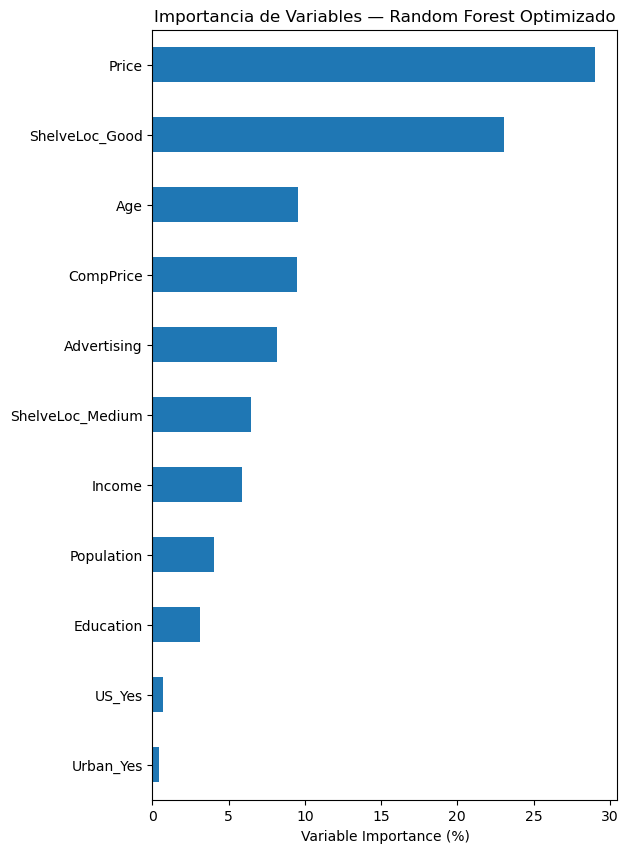

In [25]:
# Listamos las variables más importantes según el modelo:

# Creamos DataFrame 
Importance = pd.DataFrame(
    {'Importance': best_rf.feature_importances_ * 100},
    index=X_train.columns
)

# Ordenamos y graficamos
Importance.sort_values('Importance', ascending=True).plot(
    kind='barh',
    figsize=(6, 10)
)

plt.xlabel('Variable Importance (%)')
plt.title('Importancia de Variables — Random Forest Optimizado')
plt.gca().legend_ = None
plt.show()


- Optimice un GradientBoostingRegressor. Pruebe:
```python 
{'n estimators': [100, 200], 'learning rate': [0.01, 0.1], 'max depth': [3, 5]}.

In [26]:
params_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

grid_gb = GridSearchCV(
    GradientBoostingRegressor(random_state=1),
    params_gb,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("GB Best Params:", grid_gb.best_params_)
print("GB MSE:", mse_gb)
print("GB R2:", r2_gb)


GB Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
GB MSE: 1.6412130818778898
GB R2: 0.746313322445223


c) Pregunta de Interpretación (Impacto de la Optimización): Compare el MSE
de los modelos base con el de los modelos optimizados. ¿Mejoró el rendimiento después de usar GridSearchCV? ¿Por qué es importante el ajuste de hiperparámetros?

- Sí, el rendimiento mejora después de aplicar GridSearchCV. Esto pues la versión optimizada de cada modelo obtiene (i) MSE más bajo (mejor precisión en las predicciones) y (ii) R² más alto (mayor capacidad de explicar la variabilidad de la variable objetivo). Esto ocurre porque los modelos base usan hiperparámetros por defecto que no necesariamente son adecuados para el conjunto de datos; mientras que
GridSearchCV busca de forma sistemática la combinación que logra el mejor desempeño.


- El ajuste de hiperparámetros es importante porque determina directamente la complejidad del modelo: usar pocos estimadores o profundidades pequeñas genera modelos demasiado simples y con alto sesgo, mientras que emplear muchos estimadores o árboles muy profundos puede producir sobreajuste. Además, optimizar hiperparámetros mejora la capacidad de generalización, ya que herramientas como GridSearchCV aplican validación cruzada (por ejemplo, cv=5), evitando que el modelo se adapte en exceso a los datos de entrenamiento. Este proceso también contribuye a reducir el error de predicción, pues ajustar parámetros como n_estimators, max_features, learning_rate o max_depth permite encontrar un balance adecuado entre sesgo y varianza, logrando normalmente un MSE menor. Finalmente, la optimización ayuda a adaptar el modelo a la estructura particular del dataset, dado que no todos los conjuntos de datos responden igual y los hiperparámetros óptimos en un caso pueden no serlo en otro; afinar estos valores permite que el modelo capture mejor las características específicas de los datos con los que se trabaja.

### 0.2.3. Comparación Final y Conclusión
a) Cree una tabla resumen que compare el MSE en el conjunto de prueba para los 3 modelos optimizados ajustados con GridSearchCV. ¿Qué modelo tiene el mejor rendimiento?

In [27]:
df_results = pd.DataFrame({
    'Model': ['Bagging', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse_bag, mse_rf, mse_gb],
    'R2': [r2_bag, r2_rf, r2_gb],
    'Best Params': [
        grid_bag.best_params_,
        grid_rf.best_params_,
        grid_gb.best_params_
    ]
})

df_results

,Model,MSE,R2,Best Params
0,Bagging,1.875942,0.710031,{'n_estimators': 200}
1,Random Forest,1.874228,0.710296,"{'max_features': 10, 'n_estimators': 200}"
2,Gradient Boosting,1.641213,0.746313,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."


In [28]:
best_model = df_results.loc[df_results['MSE'].idxmin()]

mse_best = best_model['MSE']
r2_best = best_model['R2']
model_name = best_model['Model']

print(f"El modelo con mejor rendimiento es: {model_name}.")
print(f"MSE en el conjunto de prueba de {model_name}: {mse_best}")
print(f"R² en el conjunto de prueba de {model_name}: {r2_best}")

El modelo con mejor rendimiento es: Gradient Boosting.
MSE en el conjunto de prueba de Gradient Boosting: 1.6412130818778898
R² en el conjunto de prueba de Gradient Boosting: 0.746313322445223


b) Basado en la tabla de comparación final, ¿qué modelo le recomendaría a la empresa para predecir las ventas? Justifique su elección considerando el rendimiento predictivo (MSE) y la interpretabilidad de los modelos.

Con base en la tabla de comparación final, el modelo que recomendaría a la empresa para predecir las ventas es Gradient Boosting, ya que presenta el mejor rendimiento predictivo entre los tres modelos evaluados. Específicamente, obtiene el MSE más bajo y el R² más alto, lo que indica que es el modelo que logra capturar mayor variabilidad en la variable Sales y produce las predicciones más precisas.

Sin embargo, si la empresa priorizara la capacidad de explicar claramente cuáles son las principales variables que influyen en la predicción de las ventas, el modelo de Random Forest sería una alternativa más interpretable, ya que permite analizar fácilmente la importancia de variables. 

Aun así, considerando que el objetivo principal es maximizar la precisión de las predicciones, la recomendación final es utilizar Gradient Boosting, ya que ofrece el mejor equilibrio entre desempeño y estabilidad del modelo.